# Import libraries

In [22]:
import gym
import numpy as np
import random
import time

# Q-learning

In [23]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, done, info = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

# SARSA

In [24]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)

        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        for step in range(num_steps_per_episode):
            # state: s, action: a, reward: r, gamma: y, next_state: s' , next_action: a',
            next_state, reward, done, info = env.step(action)
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state,next_action])

            reward_episode += reward
            state = next_state
            action = next_action
            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

# hyperparemeter setup , play function and play_multiple_times function

In [25]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1

In [26]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [27]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100

In [28]:
def play(env, q_table, render=False):
    state = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            screen = env.render(mode='rgb_array')
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.5)

        state = next_state

    return (total_reward, steps)

In [29]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

# Frozenlake-v1

## Q-Learning

In [30]:
env = gym.make('FrozenLake-v1')

In [31]:
q_table_flv1, rewards_all_flv1 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [32]:
q_table_flv1

array([[0.5574723 , 0.48007655, 0.47441121, 0.46337528],
       [0.40544198, 0.30072515, 0.37205421, 0.49854121],
       [0.38279832, 0.40219392, 0.3836301 , 0.43987521],
       [0.33875124, 0.22937584, 0.26107637, 0.39911295],
       [0.56680983, 0.26134803, 0.2145215 , 0.39942899],
       [0.        , 0.        , 0.        , 0.        ],
       [0.28381878, 0.16465659, 0.14962717, 0.12108352],
       [0.        , 0.        , 0.        , 0.        ],
       [0.39698631, 0.44500535, 0.3992014 , 0.58593544],
       [0.52227407, 0.61223177, 0.47481802, 0.29867915],
       [0.61368375, 0.36362899, 0.23714892, 0.21662179],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.42877844, 0.33971523, 0.75994654, 0.55416758],
       [0.72790382, 0.87461799, 0.67579041, 0.7345673 ],
       [0.        , 0.        , 0.        , 0.        ]])

In [33]:
play_multiple_times(env, q_table_flv1, 1000)

Number of successes: 733/1000
Average number of steps: 37.001364256480215


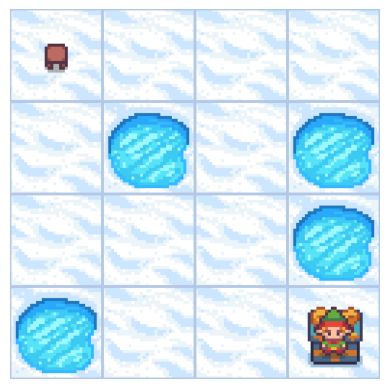

(1.0, 16)

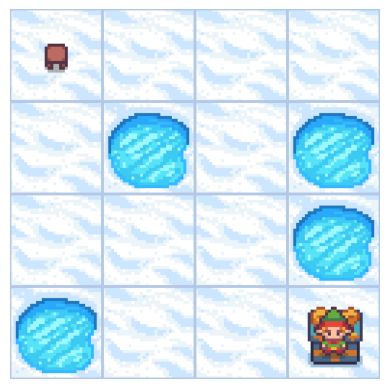

In [34]:
play(env, q_table_flv1, render=True)

In [35]:
window = 100
average_y_flv1 = []
for ind in range(len(rewards_all_flv1) - window + 1):
    average_y_flv1.append(np.mean(rewards_all_flv1[ind:ind+window]))

In [36]:
for ind in range(window - 1):
    average_y_flv1.insert(0, np.nan)

## SARSA

In [37]:
env = gym.make('FrozenLake-v1')

In [38]:
sarsa_table_flv1, sarsa_rewards_all_flv1 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [39]:
sarsa_table_flv1

array([[0.52999811, 0.48405955, 0.45629088, 0.45283504],
       [0.28992981, 0.19279603, 0.1482354 , 0.45571893],
       [0.37212979, 0.22352028, 0.14844733, 0.21915775],
       [0.19380762, 0.00623913, 0.        , 0.        ],
       [0.55317463, 0.37802381, 0.38921393, 0.33444952],
       [0.        , 0.        , 0.        , 0.        ],
       [0.39586138, 0.12085422, 0.16314623, 0.05369324],
       [0.        , 0.        , 0.        , 0.        ],
       [0.37857076, 0.36523746, 0.39465304, 0.60281372],
       [0.47857386, 0.6370195 , 0.39843315, 0.38205517],
       [0.63342128, 0.40674165, 0.37150962, 0.35421174],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.47870647, 0.48592999, 0.74046608, 0.5207738 ],
       [0.69932439, 0.90727055, 0.76973423, 0.72552045],
       [0.        , 0.        , 0.        , 0.        ]])

In [40]:
play_multiple_times(env, sarsa_table_flv1, 1000)

Number of successes: 713/1000
Average number of steps: 37.65918653576438


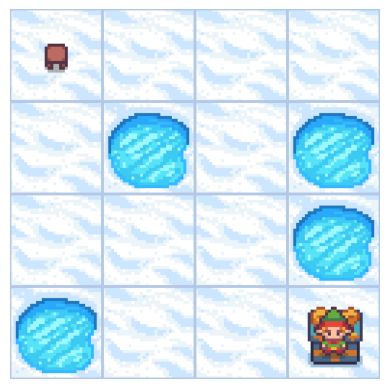

(1.0, 17)

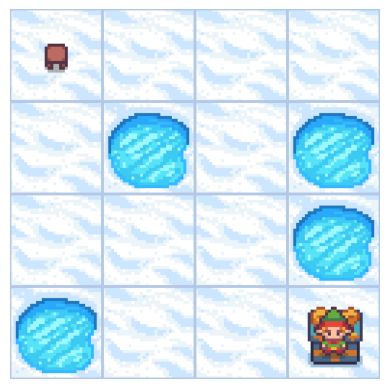

In [41]:
play(env, sarsa_table_flv1, render=True)

In [42]:
window = 100
sarsa_average_y_flv1 = []
for ind in range(len(sarsa_rewards_all_flv1) - window + 1):
    sarsa_average_y_flv1.append(np.mean(sarsa_rewards_all_flv1[ind:ind+window]))

In [43]:
for ind in range(window - 1):
    sarsa_average_y_flv1.insert(0, np.nan)

# Frozenlake8x8-v1

## Q-Learning

In [44]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.0002

num_episodes = 600000
num_steps_per_episode = 300

In [45]:
env1 = gym.make('FrozenLake8x8-v1')

In [46]:
q_table_fl8v1, rewards_all_fl8v1 = q_learning(env1, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 599999 finished


In [47]:
q_table_fl8v1

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


In [48]:
play_multiple_times(env1, q_table_fl8v1, 1000)

Number of successes: 0/1000
Average number of steps: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [49]:
# Because the number of successes is 0 so we do not need to run play function
# play(env1, q_table_fl8v1, render=True)

In [50]:
window = 100
average_y_fl8v1 = []
for ind in range(len(rewards_all_fl8v1) - window + 1):
    average_y_fl8v1.append(np.mean(rewards_all_fl8v1[ind:ind+window]))

for ind in range(window - 1):
    average_y_fl8v1.insert(0, np.nan)

## SARSA

In [51]:
env1 = gym.make('FrozenLake8x8-v1')
sarsa_table_fl8v1, sarsa_rewards_all_fl8v1 = sarsa(env1, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 599999 finished


In [52]:
sarsa_table_fl8v1

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        ,

In [53]:
play_multiple_times(env1, sarsa_table_fl8v1, 1000)

Number of successes: 0/1000
Average number of steps: nan


In [ ]:
# Because the number of successes is 0 so we do not need to run play function
# play(env1, sarsa_table_fl8v1, render=True)

In [55]:
window = 100
sarsa_average_y_fl8v1 = []
for ind in range(len(sarsa_rewards_all_fl8v1) - window + 1):
    sarsa_average_y_fl8v1.append(np.mean(sarsa_rewards_all_fl8v1[ind:ind+window]))

for ind in range(window - 1):
    sarsa_average_y_fl8v1.insert(0, np.nan)

# Taxi-v3

In [56]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100

## Q-Learning

In [57]:
env2 = gym.make('Taxi-v3')
q_table_tv3, rewards_all_tv3 = q_learning(env2, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [58]:
q_table_tv3

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.85579422, -2.70978592, -2.78293912, -0.58802122,  9.6220697 ,
        -3.78698069],
       [ 2.66246672,  0.7087909 , -0.81374416, -0.62365279, 14.11880599,
        -1.66478463],
       ...,
       [-1.05286245,  5.84248379, -1.07638413, -0.9654467 , -1.        ,
        -4.26359965],
       [-2.45823586, -2.49897633, -2.53941121,  1.11572296, -7.30107536,
        -3.55699068],
       [ 0.        , -0.1       ,  0.        , 13.80977134, -1.        ,
         0.        ]])

In [59]:
play_multiple_times(env2, q_table_tv3, 1000)

Number of successes: 1000/1000
Average number of steps: 13.168


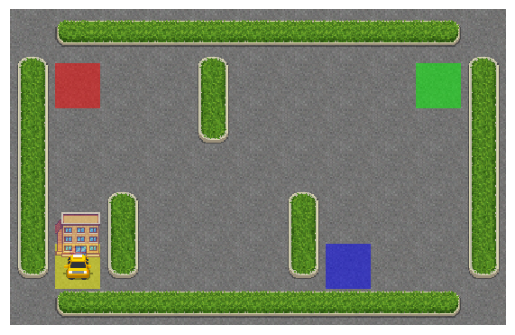

(9, 12)

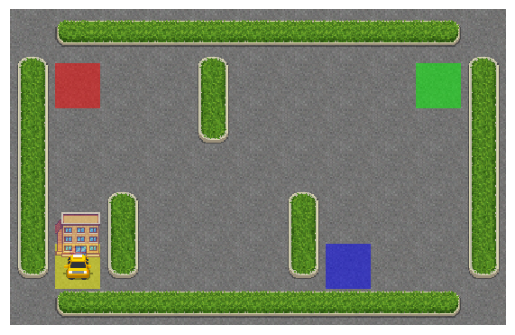

In [60]:
play(env2, q_table_tv3, render=True)

In [61]:
window = 100
average_y_tv3 = []
for ind in range(len(rewards_all_tv3) - window + 1):
    average_y_tv3.append(np.mean(rewards_all_tv3[ind:ind+window]))

for ind in range(window - 1):
    average_y_tv3.insert(0, np.nan)

## SARSA

In [62]:
env2 = gym.make('Taxi-v3')
sarsa_table_tv3, sarsa_rewards_all_tv3 = sarsa(env2, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [63]:
sarsa_table_tv3

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.84063672e-01, -1.11327674e+00, -3.64801925e+00,
         2.45111805e-01,  9.00972579e+00, -5.67911246e+00],
       [-2.14809794e+00,  1.76263283e+00,  4.06376999e+00,
        -7.45930638e-01,  1.39604133e+01, -1.31889146e+00],
       ...,
       [-1.51292164e+00, -1.45482728e+00, -1.61473460e+00,
         5.78197577e-03, -3.83629637e+00, -7.27646734e+00],
       [-3.31699365e+00, -7.38658871e-01, -3.19150640e+00,
        -3.20346671e+00, -5.01789828e+00, -5.53501594e+00],
       [-1.00000000e-01, -1.00000000e-01, -1.00000000e-01,
         9.76463771e+00,  0.00000000e+00,  0.00000000e+00]])

In [64]:
play_multiple_times(env2, q_table_tv3, 1000)

Number of successes: 1000/1000
Average number of steps: 13.06


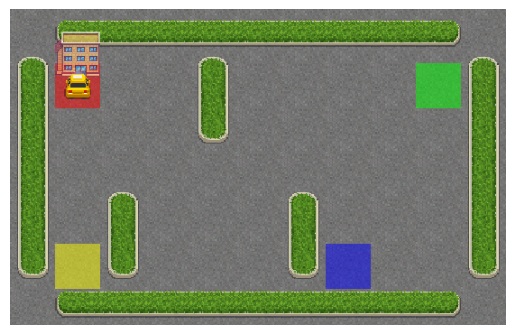

(7, 14)

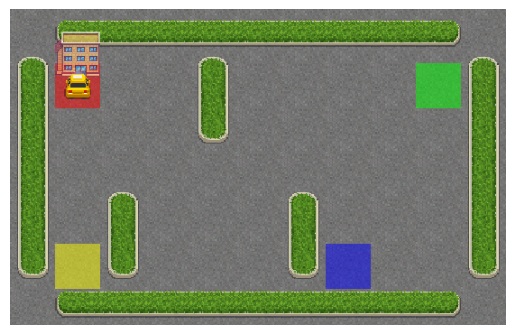

In [65]:
play(env2, sarsa_table_tv3, render=True)

In [66]:
window = 100
sarsa_average_y_tv3 = []
for ind in range(len(sarsa_rewards_all_tv3) - window + 1):
    sarsa_average_y_tv3.append(np.mean(sarsa_rewards_all_tv3[ind:ind+window]))

for ind in range(window - 1):
    sarsa_average_y_tv3.insert(0, np.nan)

# Results and comments

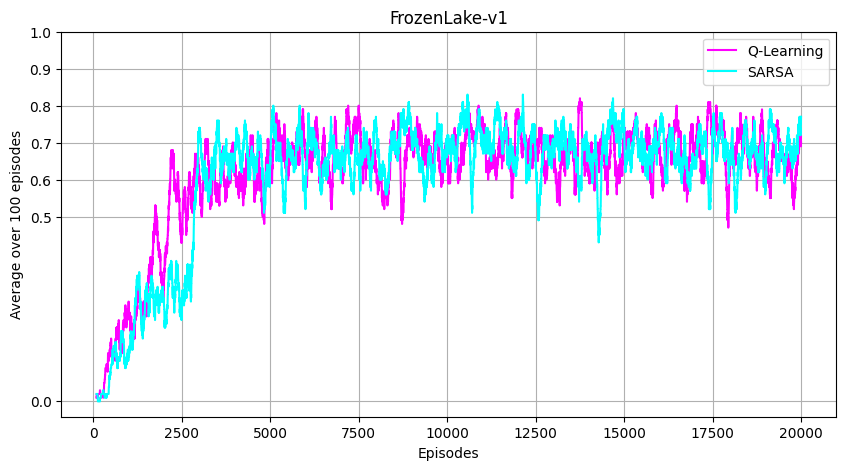

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_flv1)), average_y_flv1, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(sarsa_rewards_all_flv1)), sarsa_average_y_flv1, color='cyan', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('FrozenLake-v1')
plt.legend()
plt.show()

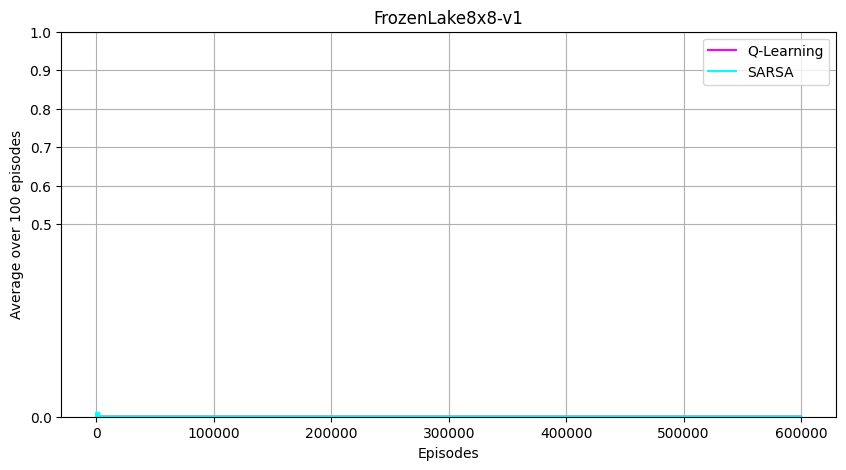

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_fl8v1)), average_y_fl8v1, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(sarsa_rewards_all_fl8v1)), sarsa_average_y_fl8v1, color='cyan', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('FrozenLake8x8-v1')
plt.legend()
plt.show()

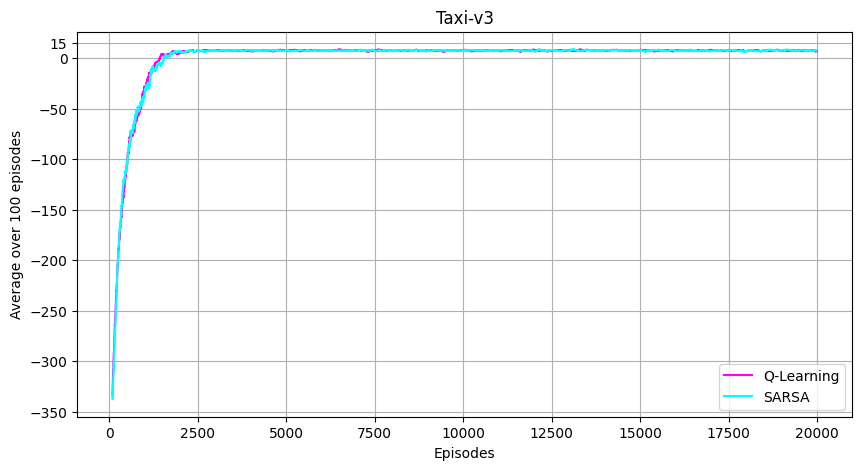

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_tv3)), average_y_tv3, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(sarsa_rewards_all_tv3)), sarsa_average_y_tv3, color='cyan', label='SARSA')
plt.yticks([-350, -300 ,-250,-200,-150,-100,-50, 0, 15])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('Taxi-v3')
plt.legend()
plt.show()

Thống kê về kết quả:

In [70]:
import pandas as pd
success = [[733,713],[0,0],[1000,1000]]
average_step = [[37.001364256480215,37.65918653576438],['nan','nan'],[13.168,13.06]]

In [71]:
df1 = pd.DataFrame(success,index=['FrozenLake-v1','FrozenLake8x8-v1','Taxi-v3'],columns=['Q-LEARNING','SARSA'])

In [72]:
df2 = pd.DataFrame(average_step,index=['FrozenLake-v1','FrozenLake8x8-v1','Taxi-v3'],columns=['Q-LEARNING','SARSA'])

In [73]:
print('\t Number of successes')
df1

	 Number of successes


,Q-LEARNING,SARSA
FrozenLake-v1,733,713
FrozenLake8x8-v1,0,0
Taxi-v3,1000,1000


In [74]:
print('\t Average number of steps')
df2

	 Average number of steps


,Q-LEARNING,SARSA
FrozenLake-v1,37.001364,37.659187
FrozenLake8x8-v1,nan,nan
Taxi-v3,13.168,13.06


### Đối với trò chơi FrozenLake-v1:
- Có thể dễ dàng thấy Q-Learning có số lần thành công và số bước đi trung bình chênh lệch không quá nhiều so với SARSA.
- Dựa trên biểu đồ thì trong từ 0 đến 2500 episode đầu thì giá trị Q của SARSA thấp hơn thấy rõ so với Q-Learning.
- Nên trong trò chơi này Q-Learning có thể hoạt động tốt hơn SARSA dù các chỉ số chênh nhau không quá lớn.

### Đối với trò chơi FrozenLake8x8-v1:
- Cả Q-Learning và SARSA đều không tìm ra được lời giải với số lần thành công bằng 0. Điều này cho thấy môi trường 8x8 quá phức tạp và thách thức đối với cả hai thuật toán trong việc tìm ra chiến lược tối ưu.

### Đối với trò chơi Taxi-v3:
- Cả 2 thuật toán Q-Learning và SARSA đều có số lần thành công là 1000/1000 và số bước đi trung bình cũng xấp xỉ bằng nhau.
- Dựa trên biểu đồ, giá trị Q của cả hai thuật toán xấp xỉ nhau, cho thấy không có sự khác biệt đáng kể giữa chúng trong môi trường này.

### Kết luận
- Chưa thế đánh giá thuật toán nào tốt hơn thuật toán nào vì phụ thuộc khá lớn vào từng môi trường mà 2 thuật toán chạy trên đó.
- Q-Learning là một thuật toán off-policy learning (học từ các hành động được thực hiện ngẫu nhiên hoặc không có chiến lược trước). Q-Learning chọn chiến lược dựa trên tìm kiếm tham lam (tìm chiến lược có giá trị Q lớn nhất để chọn).
- SARSA là một thuật toán on-policy learning (học từ các hành động đã được thực hiện theo chiến lược hiện tại). SARSA chọn chiến lược dựa trên chiến lược hiện tại và cập nhật giá trị của Q.
- Hiệu quả của SARSA và Q-Learning phụ thuộc nhiều vào đặc điểm của từng môi trường cụ thể. Trong các môi trường đơn giản hơn như FrozenLake-v1 và Taxi-v3, cả hai thuật toán đều hoạt động tốt. Trong môi trường phức tạp như FrozenLake8x8-v1, cả hai thuật toán đều gặp khó khăn.


